# A Machine Learning Based Approach To Classify Disturbance From Phasor Measurement Unit (PMU) 

## Here, short circuit faults analysis was performed to categorize Short-Circuit faults based on the magnitudes of line voltages and line currents.

## There are two categories of short circuit disturbance, such as

##    Symmetrical Faults (Three Phase Faults):

  ###       -Line to line to line to ground (L-L-L-G)
  ###      -Line to line to line (L-L-L)

##    Unsymmetrical Faults (One & Two Phase Faults):

  ###        -Line to ground (L-G)
  ###       -Line to line (L-L)
  ###        -Double line to ground (LL-G)

In [560]:
import numpy as np # linear algebra
import pandas as pd # data processing 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [561]:
#Google drive connection
from google.colab import drive

In [562]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [563]:
#Importing Dataset
PMU_Class = pd.read_csv('/content/drive/MyDrive/PMU_Classification/PMU_Class.csv')

# Dataset

## Dataset named 'PMU_Class' was used to categorize different types of Faults.

## In the datset, A,B,C are considered as 3-phases of the electrical system.  

# Inputs - [Ia,Ib,Ic,Va,Vb,Vc]

# Outputs - [G C B A]

## Examples :

### [0 0 0 0] - No Fault

### [1 0 0 1] - LG fault (Between Phase A and ground)

### [0 0 1 1] - LL fault (Between Phase A and Phase B)

### [1 0 1 1] - LLG Fault (Between Phases A,B and ground)

### [0 1 1 1] - LLL Fault(Between all three phases)

### [1 1 1 1] - LLLG fault( Three phase symmetrical fault)

In [564]:
# Visualizing top 5 rows from the Dataset
PMU_Class.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [565]:
# PMU_Class
print(f"The Dataset to be classified has {PMU_Class.shape[0]} rows and {PMU_Class.shape[1]} columns.")

The Dataset to be classified has 7861 rows and 10 columns.


In [566]:
# Null values identification
PMU_Class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


### Dataset doesn't contain any null values.

In [567]:
# Dataset description
PMU_Class.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


### Few statistical factors have calculated here from the dataset, such as percentile, mean and std of the numerical values.

In [568]:
# Identify duplication
print(f"Dataset Classify has {PMU_Class.duplicated().sum()} duplicate values.")

Dataset Classify has 0 duplicate values.


### Dataset doesn't contain any duplicate values.

In [569]:
# Visualizing Column names
PMU_Class.columns

Index(['G', 'C', 'B', 'A', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')

# Feature Engineering

In [570]:
# Classifying fault types  
PMU_Class['fault_types'] = PMU_Class['G'].astype('str') + PMU_Class['C'].astype('str') + PMU_Class['B'].astype('str') + PMU_Class['A'].astype('str')
PMU_Class.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_types
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


### Differnt fault types have categorized as a feature in the dataset.  

# Fault analyzation and visualization



## Visualizing different scenarios for votlage phases (Va, Vb, Vc) and current phases (Ia, Ib, Ic) with refferenced to different fault types.

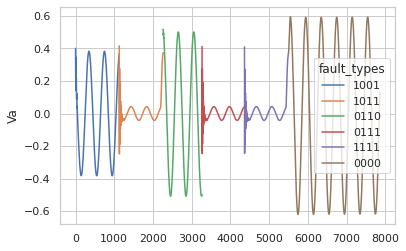

In [571]:
# Visualizing for Va
import seaborn as sns

sns.lineplot(x=PMU_Class.index, y='Va', data=PMU_Class, hue='fault_types')

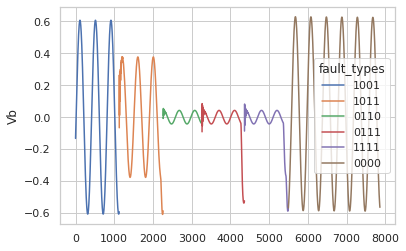

In [572]:
# Visualizing for Vb
import seaborn as sns

sns.lineplot(x=PMU_Class.index, y='Vb', data=PMU_Class, hue='fault_types')

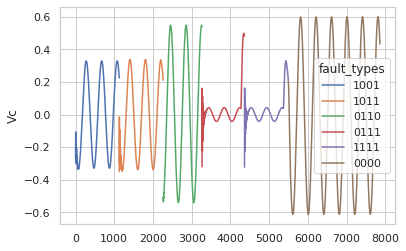

In [573]:
# Visualizing for Vc
import seaborn as sns

sns.lineplot(x=PMU_Class.index, y='Vc', data=PMU_Class, hue='fault_types')

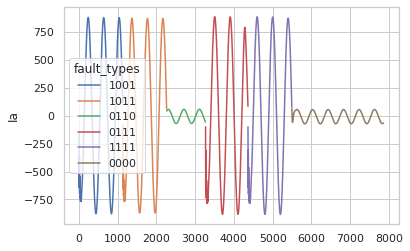

In [574]:
# Visualizing for Ia
import seaborn as sns

sns.lineplot(x=PMU_Class.index, y='Ia', data=PMU_Class, hue='fault_types')

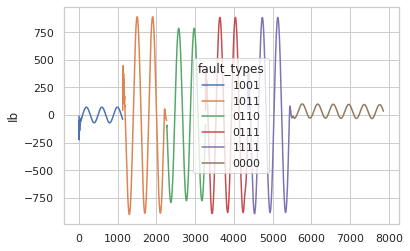

In [575]:
# Visualizing for Ib
import seaborn as sns

sns.lineplot(x=PMU_Class.index, y='Ib', data=PMU_Class, hue='fault_types')

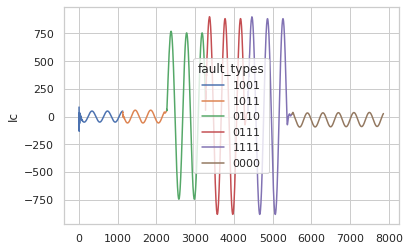

In [576]:
# Visualizing for Ic
import seaborn as sns

sns.lineplot(x=PMU_Class.index, y='Ic', data=PMU_Class, hue='fault_types')

In [577]:
# Differnt fault categories
print("[G C B A]\n[0 0 0 0] -> No fault \n[1 0 0 1] -> LG fault\n[0 1 1 0] -> LL fault\n[1 0 1 1] -> LLG Fault\n[0 1 1 1] -> LLL Fault\n[1 1 1 1] -> LLLG fault\n")

[G C B A]
[0 0 0 0] -> No fault 
[1 0 0 1] -> LG fault
[0 1 1 0] -> LL fault
[1 0 1 1] -> LLG Fault
[0 1 1 1] -> LLL Fault
[1 1 1 1] -> LLLG fault



In [578]:
# Assign names to differnt fault categories
NF = PMU_Class[PMU_Class['fault_types']=='0000']
LG = PMU_Class[PMU_Class['fault_types']=='1001'] 
LL = PMU_Class[PMU_Class['fault_types']=='0110'] 
LLG = PMU_Class[PMU_Class['fault_types']=='1011'] 
LLL = PMU_Class[PMU_Class['fault_types']=='0111'] 
LLLG = PMU_Class[PMU_Class['fault_types']=='1111']

## Visualizing differnt fault case scenarios for each voltage and cureent phases.

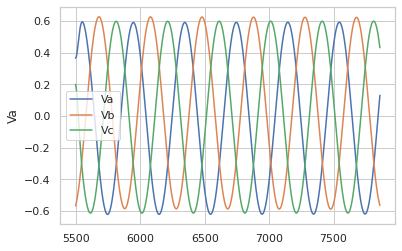

In [579]:
# Voltage phases ubder no fault condition
import seaborn as sns

sns.lineplot(x=NF.index, y='Va', data=NF, label='Va')
sns.lineplot(x=NF.index, y='Vb', data=NF, label='Vb')
sns.lineplot(x=NF.index, y='Vc', data=NF, label='Vc')

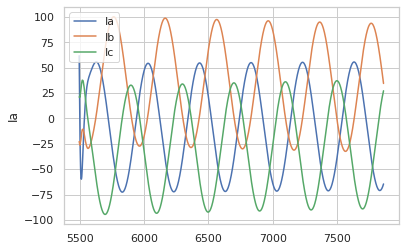

In [580]:
# Current phases ubder no fault condition
sns.lineplot(x=NF.index, y='Ia', data=NF, label='Ia')
sns.lineplot(x=NF.index, y='Ib', data=NF, label='Ib')
sns.lineplot(x=NF.index, y='Ic', data=NF, label='Ic')

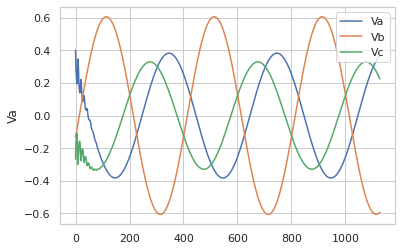

In [581]:
# Voltage phases ubder LG fault condition
sns.lineplot(x=LG.index, y='Va', data=LG, label='Va')
sns.lineplot(x=LG.index, y='Vb', data=LG, label='Vb')
sns.lineplot(x=LG.index, y='Vc', data=LG, label='Vc')


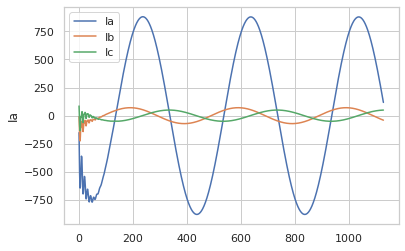

In [582]:
# Current phases ubder LG fault condition
sns.lineplot(x=LG.index, y='Ia', data=LG, label='Ia')
sns.lineplot(x=LG.index, y='Ib', data=LG, label='Ib')
sns.lineplot(x=LG.index, y='Ic', data=LG, label='Ic')

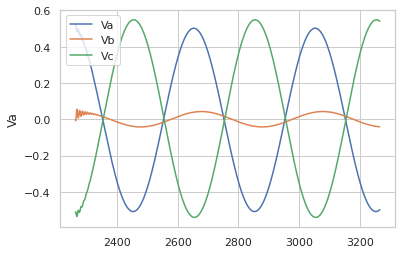

In [583]:
# Voltage phases ubder LL fault condition
sns.lineplot(x=LL.index, y='Va', data=LL, label='Va')
sns.lineplot(x=LL.index, y='Vb', data=LL, label='Vb')
sns.lineplot(x=LL.index, y='Vc', data=LL, label='Vc')

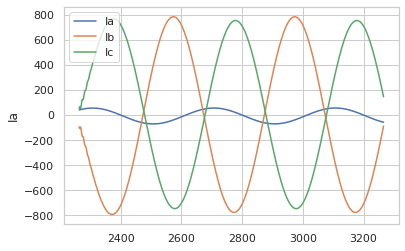

In [584]:
# Current phases ubder LL fault condition
sns.lineplot(x=LL.index, y='Ia', data=LL, label='Ia')
sns.lineplot(x=LL.index, y='Ib', data=LL, label='Ib')
sns.lineplot(x=LL.index, y='Ic', data=LL, label='Ic')

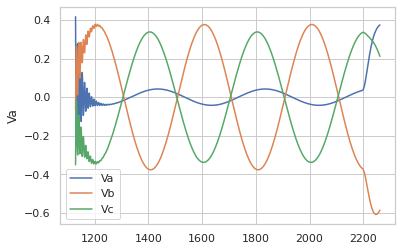

In [585]:
# Voltage phases ubder LLG fault condition
sns.lineplot(x=LLG.index, y='Va', data=LLG, label='Va')
sns.lineplot(x=LLG.index, y='Vb', data=LLG, label='Vb')
sns.lineplot(x=LLG.index, y='Vc', data=LLG, label='Vc')

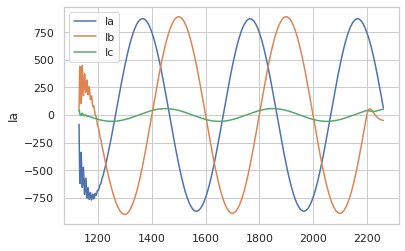

In [586]:
# Current phases ubder LLG fault condition
sns.lineplot(x=LLG.index, y='Ia', data=LLG, label='Ia')
sns.lineplot(x=LLG.index, y='Ib', data=LLG, label='Ib')
sns.lineplot(x=LLG.index, y='Ic', data=LLG, label='Ic')

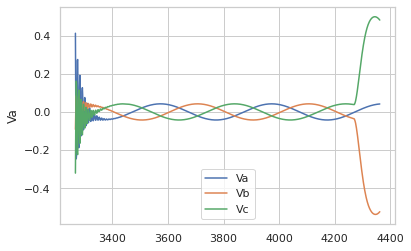

In [587]:
# Voltage phases ubder LLL fault condition
sns.lineplot(x=LLL.index, y='Va', data=LLL, label='Va')
sns.lineplot(x=LLL.index, y='Vb', data=LLL, label='Vb')
sns.lineplot(x=LLL.index, y='Vc', data=LLL, label='Vc')

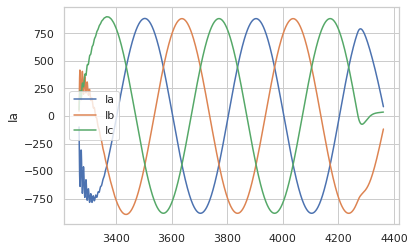

In [588]:
# Current phases ubder LLL fault condition
sns.lineplot(x=LLL.index, y='Ia', data=LLL, label='Ia')
sns.lineplot(x=LLL.index, y='Ib', data=LLL, label='Ib')
sns.lineplot(x=LLL.index, y='Ic', data=LLL, label='Ic')

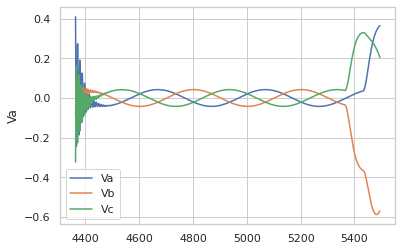

In [589]:
# Voltage phases ubder LLLG fault condition
sns.lineplot(x=LLLG.index, y='Va', data=LLLG, label='Va')
sns.lineplot(x=LLLG.index, y='Vb', data=LLLG, label='Vb')
sns.lineplot(x=LLLG.index, y='Vc', data=LLLG, label='Vc')

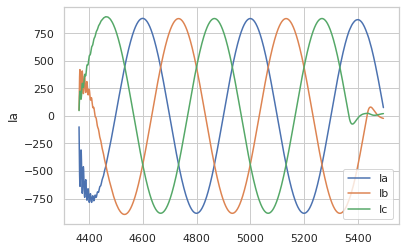

In [590]:
# Current phases ubder LLLG fault condition
sns.lineplot(x=LLLG.index, y='Ia', data=LLLG, label='Ia')
sns.lineplot(x=LLLG.index, y='Ib', data=LLLG, label='Ib') 
sns.lineplot(x=LLLG.index, y='Ic', data=LLLG, label='Ic')

In [591]:
# Categorized fault data counts
PMU_Class["fault_types"].value_counts()

0000    2365
1011    1134
1111    1133
1001    1129
0111    1096
0110    1004
Name: fault_types, dtype: int64

# Building Pipeline & Model Selection

In [592]:
features = ['Ia', 'Ib','Ic','Va','Vb','Vc']

In [593]:
x = PMU_Class[features] # Collection of features
y = PMU_Class['fault_types'] # Target or the labels to predict

In [594]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

y = le.fit_transform(y)

In [595]:
# Train & Test dataset split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =7)

## Principal Component Analysis

In [596]:
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

## K-Neighbors Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


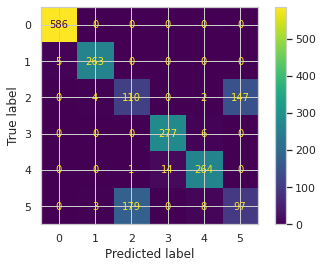

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       586
           1       0.97      0.98      0.98       268
           2       0.38      0.42      0.40       263
           3       0.95      0.98      0.97       283
           4       0.94      0.95      0.94       279
           5       0.40      0.34      0.37       287

    accuracy                           0.81      1966
   macro avg       0.77      0.78      0.77      1966
weighted avg       0.81      0.81      0.81      1966



In [597]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.plot_confusion_matrix(knnclassifier,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))


## Support Vector Classifier

### One VS Rest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


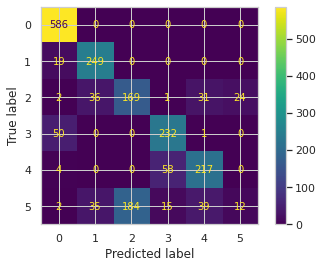

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       586
           1       0.78      0.93      0.85       268
           2       0.48      0.64      0.55       263
           3       0.76      0.82      0.79       283
           4       0.75      0.78      0.77       279
           5       0.33      0.04      0.07       287

    accuracy                           0.75      1966
   macro avg       0.66      0.70      0.66      1966
weighted avg       0.70      0.75      0.70      1966



In [598]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
SVC = SVC()
SVC_O_VS_R = OneVsRestClassifier(SVC)
SVC_O_VS_R.fit(x_train,y_train)
y_pred = SVC_O_VS_R.predict(x_test)
metrics.plot_confusion_matrix(SVC_O_VS_R,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

### One VS One

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


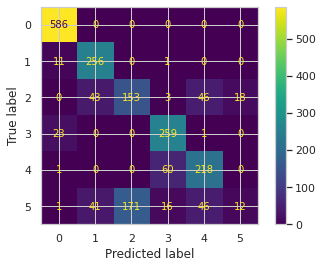

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       586
           1       0.75      0.96      0.84       268
           2       0.47      0.58      0.52       263
           3       0.76      0.92      0.83       283
           4       0.70      0.78      0.74       279
           5       0.40      0.04      0.08       287

    accuracy                           0.75      1966
   macro avg       0.67      0.71      0.66      1966
weighted avg       0.71      0.75      0.71      1966



In [599]:
from sklearn.multiclass import OneVsOneClassifier
SVC_O_VS_O = OneVsOneClassifier(SVC)
SVC_O_VS_O.fit(x_train,y_train)
y_pred = SVC_O_VS_O.predict(x_test)
metrics.plot_confusion_matrix(SVC_O_VS_O,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

## Decision Tree Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


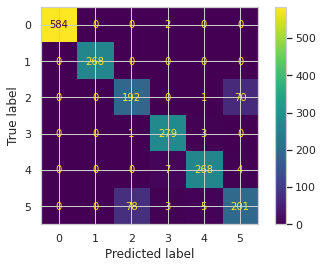

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       586
           1       1.00      1.00      1.00       268
           2       0.71      0.73      0.72       263
           3       0.96      0.99      0.97       283
           4       0.97      0.96      0.96       279
           5       0.73      0.70      0.72       287

    accuracy                           0.91      1966
   macro avg       0.89      0.90      0.89      1966
weighted avg       0.91      0.91      0.91      1966



In [600]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
metrics.plot_confusion_matrix(DT,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

## Random Forest Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


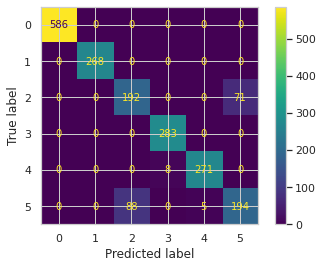

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       586
           1       1.00      1.00      1.00       268
           2       0.69      0.73      0.71       263
           3       0.97      1.00      0.99       283
           4       0.98      0.97      0.98       279
           5       0.73      0.68      0.70       287

    accuracy                           0.91      1966
   macro avg       0.90      0.90      0.90      1966
weighted avg       0.91      0.91      0.91      1966



In [601]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
metrics.plot_confusion_matrix(RF,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

## Gradient Boosting Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


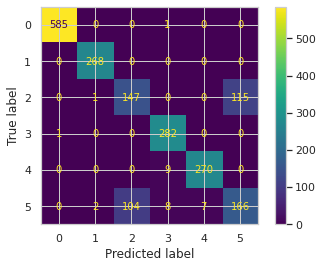

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       586
           1       0.99      1.00      0.99       268
           2       0.59      0.56      0.57       263
           3       0.94      1.00      0.97       283
           4       0.97      0.97      0.97       279
           5       0.59      0.58      0.58       287

    accuracy                           0.87      1966
   macro avg       0.85      0.85      0.85      1966
weighted avg       0.87      0.87      0.87      1966



In [602]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
y_pred = GB.predict(x_test)
metrics.plot_confusion_matrix(GB,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

## Gaussian Naive Bayes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


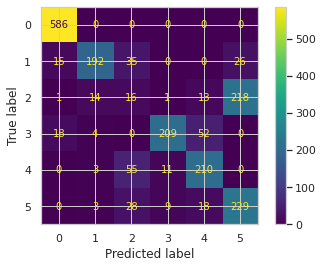

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       586
           1       0.89      0.72      0.79       268
           2       0.12      0.06      0.08       263
           3       0.91      0.74      0.81       283
           4       0.72      0.75      0.73       279
           5       0.48      0.80      0.60       287

    accuracy                           0.73      1966
   macro avg       0.68      0.68      0.67      1966
weighted avg       0.72      0.73      0.72      1966



In [603]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred = GNB.predict(x_test)
metrics.plot_confusion_matrix(GNB,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

## Multi-layer Perceptron classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


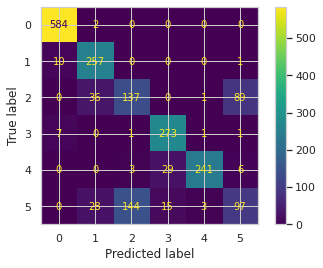

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       586
           1       0.80      0.96      0.87       268
           2       0.48      0.52      0.50       263
           3       0.86      0.96      0.91       283
           4       0.98      0.86      0.92       279
           5       0.50      0.34      0.40       287

    accuracy                           0.81      1966
   macro avg       0.76      0.77      0.76      1966
weighted avg       0.80      0.81      0.80      1966



In [604]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=0, max_iter=300)
MLP.fit(x_train,y_train)
y_pred = MLP.predict(x_test)
metrics.plot_confusion_matrix(MLP,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

## Evaluating & Comparing Models

In [605]:
# Classifiers
names = ["knnclassifier", "SVC_O_VS_R", "SVC_O_VS_O", "DT", "RF", "GB", "GNB", "MLP"]

classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    OneVsRestClassifier(SVC),
    OneVsOneClassifier(SVC),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    MLPClassifier(random_state=0, max_iter=300)]         

In [606]:
# Load accuracy score
scores = []

for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    cross_validation_score = cross_val_score(clf, x_test, y_test, cv=10, scoring ='accuracy').mean()
    scores.append(cross_validation_score)

In [607]:
# Load data into data frame
df = pd.DataFrame()
df['name'] = names
df['cross_validation_score'] = scores

In [608]:
# Visualizing accuracy score
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,cross_validation_score
0,knnclassifier,0.830107
1,SVC_O_VS_R,0.741083
2,SVC_O_VS_O,0.733984
3,DT,0.867756
4,RF,0.863672
5,GB,0.856055
6,GNB,0.730902
7,MLP,0.793010


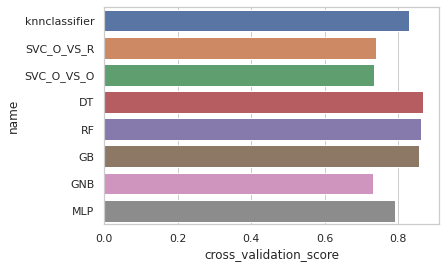

In [609]:
# Visualizing accuracy score on chart
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="cross_validation_score", data=df)

### Decision Tree Classifier has well-performed than the other Classifiers. 

# Hyperparameter Tuning

## Randomized Search

In [610]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [611]:
DT=DecisionTreeClassifier(criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100)
DT_randomcv=RandomizedSearchCV(estimator=DT,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)

### fit the randomized model
DT_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_features='sqrt',
                                                    min_samples_leaf=10,
                                                    random_state=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [612]:
best_random_grid=DT_randomcv.best_estimator_

In [613]:
# Optimal Parameters
best_random_grid

DecisionTreeClassifier(criterion='entropy', max_depth=560, max_features='sqrt',
                       random_state=100)

In [614]:
from sklearn.metrics import accuracy_score

y_pred=best_random_grid.predict(x_test)
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score 0.9165818921668362


## Grid Search

In [615]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': [DT_randomcv.best_params_['max_features']],
    'max_depth': [DT_randomcv.best_params_['max_depth']],
    'min_samples_split': [DT_randomcv.best_params_['min_samples_split'],
                          DT_randomcv.best_params_['min_samples_split'] +1,
                          DT_randomcv.best_params_['min_samples_split'] + 2], 
    'min_samples_leaf': [DT_randomcv.best_params_['min_samples_leaf'],
                         DT_randomcv.best_params_['min_samples_leaf']+2, 
                         DT_randomcv.best_params_['min_samples_leaf'] + 4],          
    'criterion': [DT_randomcv.best_params_['criterion']],
}

print(param_grid)

{'max_features': ['sqrt'], 'max_depth': [560], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 3, 5], 'criterion': ['entropy']}


In [616]:
DT=DecisionTreeClassifier(criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100)
grid_search=GridSearchCV(estimator=DT,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_features='sqrt',
                                              min_samples_leaf=10,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [560],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4]},
             verbose=2)

In [617]:
best_grid=grid_search.best_estimator_

In [618]:
# Optimal Parameters
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=560, max_features='sqrt',
                       random_state=100)

In [622]:
y_pred=best_grid.predict(x_test)
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score 0.9165818921668362
